classes:
[[1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]


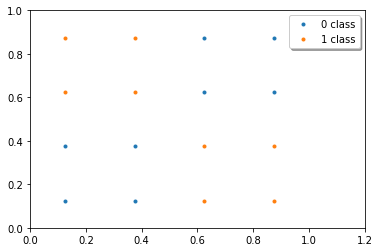

In [6]:
# First dataset
# Solution - head-on (random, until there are 8 elements each and we check for separability)

import matplotlib.pyplot as plt
import numpy as np


def is_separable(matrix):
    if matrix.sum() == 8:
        # horizontal check
        if sum(matrix[0]) == sum(matrix[1]) == 4 or sum(matrix[2]) == sum(matrix[3]) == 4:
            return True
        # vertical check
        matrix = np.matrix.transpose(matrix)
        if sum(matrix[0]) == sum(matrix[1]) == 4 or sum(matrix[2]) == sum(matrix[3]) == 4:
            return True
    return False


def random_matrix():
    y_train = np.round(np.random.rand(4, 4))
    while is_separable(y_train):
        y_train = np.round(np.random.rand(4, 4))
    return y_train


def load_data(y_train=random_matrix(), show=False, save=False):
    if y_train.shape != (4, 4):
        raise TypeError("Shape can be only (4,4)")

    print("classes:")
    print(y_train)

    train_size = int(y_train.shape[0] * y_train.shape[1])
    x_train = np.zeros(train_size * 2)

    first_class_x = np.zeros(8)
    first_class_y = np.zeros(8)
    second_class_x = np.zeros(8)
    second_class_y = np.zeros(8)

    i = 0
    one_i = 0
    zero_i = 0
    for y in np.arange(0, y_train.shape[0], 1, dtype=int):
        for x in np.arange(0, y_train.shape[1], 1, dtype=int):
            if y_train[y_train.shape[0] - y - 1][x] == 1:
                second_class_x[one_i] = x / 4.0 + 0.125
                second_class_y[one_i] = y / 4.0 + 0.125
                one_i += 1
            elif y_train[y_train.shape[0] - y - 1][x] == 0:
                first_class_x[zero_i] = x / 4.0 + 0.125
                first_class_y[zero_i] = y / 4.0 + 0.125
                zero_i += 1

            x_train[i] = y / 4.0 + 0.125
            x_train[i + 1] = x / 4.0 + 0.125
            i += 2

    plt.plot(first_class_x, first_class_y, '.')
    plt.plot(second_class_x, second_class_y, '.')
    plt.xlim(0, 1.2)
    plt.ylim(0, 1)

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    if save:
        plt.savefig('../plots/first.png')
    if show:
        plt.show()
    plt.close()

    return (x_train[::-1].reshape(train_size, 2), y_train.reshape(train_size, 1))



y_train = np.array([[1, 1, 0, 0],
                    [1, 1, 0, 0],
                    [0, 0, 1, 1],
                    [0, 0, 1, 1]])

(x_train, y_train) = load_data(y_train, show=True)


In [7]:
# Second dataset

import numpy as np


# Displays squares of numbers between 0 and 31
def func(x1: int, x2: int, x3: int, x4: int, x5: int):
    """
    ~x1 & ~x2 & ~x3 & ~x4 & x5  |
    ~x1 & ~x2 & x3 & ~x4 & ~x5  |
    x1 & ~x2 & ~x3 & ~x4 & ~x5  |
    x2 & ~x3 & ~x4 & x5
    """
    return (not x1) & (not x2) & (not x3) & (not x4) & x5 \
           | (not x1) & (not x2) & x3 & (not x4) & (not x5) \
           | x1 & (not x2) & (not x3) & (not x4) & (not x5) \
           | x2 & (not x3) & (not x4) & x5


def load_data():
    x_train = np.empty(0)
    y_train = np.empty(0)
    for x1 in range(0, 2):
        for x2 in range(0, 2):
            for x3 in range(0, 2):
                for x4 in range(0, 2):
                    for x5 in range(0, 2):
                        x_train = np.append(x_train, np.array([x1, x2, x3, x4, x5]))
                        y_train = np.append(y_train, func(x1, x2, x3, x4, x5))

    return (x_train.reshape(32, 5), y_train)


(x_train, y_train) = load_data()

print("СДНФ")
print(func.__doc__)
print("Table of truth:")
for i in range(0, 32):
    print(i, x_train[i], "=", y_train[i])

СДНФ

    ~x1 & ~x2 & ~x3 & ~x4 & x5  |
    ~x1 & ~x2 & x3 & ~x4 & ~x5  |
    x1 & ~x2 & ~x3 & ~x4 & ~x5  |
    x2 & ~x3 & ~x4 & x5
    
Table of truth:
0 [0. 0. 0. 0. 0.] = 0.0
1 [0. 0. 0. 0. 1.] = 1.0
2 [0. 0. 0. 1. 0.] = 0.0
3 [0. 0. 0. 1. 1.] = 0.0
4 [0. 0. 1. 0. 0.] = 1.0
5 [0. 0. 1. 0. 1.] = 0.0
6 [0. 0. 1. 1. 0.] = 0.0
7 [0. 0. 1. 1. 1.] = 0.0
8 [0. 1. 0. 0. 0.] = 0.0
9 [0. 1. 0. 0. 1.] = 1.0
10 [0. 1. 0. 1. 0.] = 0.0
11 [0. 1. 0. 1. 1.] = 0.0
12 [0. 1. 1. 0. 0.] = 0.0
13 [0. 1. 1. 0. 1.] = 0.0
14 [0. 1. 1. 1. 0.] = 0.0
15 [0. 1. 1. 1. 1.] = 0.0
16 [1. 0. 0. 0. 0.] = 1.0
17 [1. 0. 0. 0. 1.] = 0.0
18 [1. 0. 0. 1. 0.] = 0.0
19 [1. 0. 0. 1. 1.] = 0.0
20 [1. 0. 1. 0. 0.] = 0.0
21 [1. 0. 1. 0. 1.] = 0.0
22 [1. 0. 1. 1. 0.] = 0.0
23 [1. 0. 1. 1. 1.] = 0.0
24 [1. 1. 0. 0. 0.] = 0.0
25 [1. 1. 0. 0. 1.] = 1.0
26 [1. 1. 0. 1. 0.] = 0.0
27 [1. 1. 0. 1. 1.] = 0.0
28 [1. 1. 1. 0. 0.] = 0.0
29 [1. 1. 1. 0. 1.] = 0.0
30 [1. 1. 1. 1. 0.] = 0.0
31 [1. 1. 1. 1. 1.] = 0.0


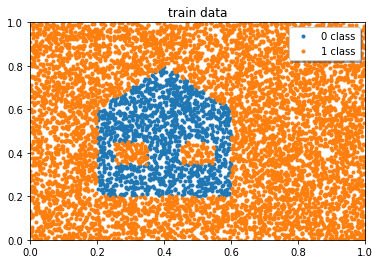

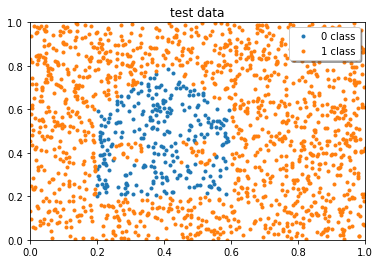

In [8]:
# Third dataset

import matplotlib.pyplot as plt
import random as rand
import numpy as np
import sys

sys.path.append('../..')

from lib.draw import *


def load_data(train_size=4000, show=False):
    test_size = int(train_size * 0.2)

    x_train = np.empty(0)
    y_train = np.empty(0)

    x_test = np.empty(0)
    y_test = np.empty(0)

    # Zero class
    x0_train = np.empty(0)
    x0_test = np.empty(0)

    # First class
    x1_train = np.empty(0)
    x1_test = np.empty(0)

    for i in range(train_size + test_size):
        x = rand.uniform(0, 1)
        y = rand.uniform(0, 1)
        if i < train_size:
            x_train = np.append(x_train, (x, y))
        else:
            x_test = np.append(x_test, (x, y))

        # Text
        if (draw_rectangle(x, y, 0.2, 0.2, 0.6, 0.6) | draw_triangle(x, y, 0.2, 0.6, 0.4, 0.8, 0.6, 0.6)) \
                and not draw_rectangle(x, y, 0.25, 0.35, 0.35, 0.45) \
                and not draw_rectangle(x, y, 0.45, 0.35, 0.55, 0.45):
            if i < train_size:
                x0_train = np.append(x0_train, (x, y))
                y_train = np.append(y_train, 1)
            else:
                x0_test = np.append(x0_test, (x, y))
                y_test = np.append(y_test, 1)
        else:
            if i < train_size:
                x1_train = np.append(x1_train, (x, y))
                y_train = np.append(y_train, 0)
            else:
                x1_test = np.append(x1_test, (x, y))
                y_test = np.append(y_test, 0)

    # Reshaping
    x_train.shape = (train_size, 2)
    x_test.shape = (test_size, 2)

    x0_train.shape = (int(x0_train.size / 2), 2)
    x1_train.shape = (int(x1_train.size / 2), 2)

    x0_test.shape = (int(x0_test.size / 2), 2)
    x1_test.shape = (int(x1_test.size / 2), 2)

    # Plotting train
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("train data")
    plt.plot(x0_train.transpose()[0], x0_train.transpose()[1], '.')
    plt.plot(x1_train.transpose()[0], x1_train.transpose()[1], '.')

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    if show:
        plt.show()

    plt.close()

    # Plotting test
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("test data")
    plt.plot(x0_test.transpose()[0], x0_test.transpose()[1], '.')
    plt.plot(x1_test.transpose()[0], x1_test.transpose()[1], '.')

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    if show:
        plt.show()

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data(train_size=8000, show=True)


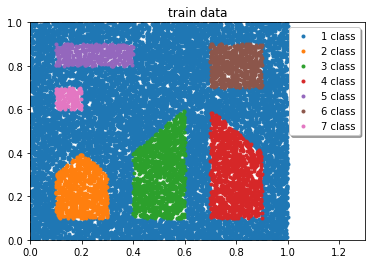

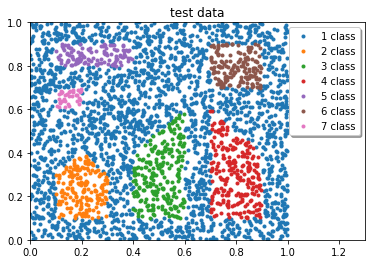

In [9]:
# Fourth dataset

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../..')

from lib.draw import *


def load_data(train_size=4000, show=False):
    test_size = int(train_size * 0.2)

    x_train = np.empty(0)
    y_train = np.empty(0)

    x_test = np.empty(0)
    y_test = np.empty(0)

    train_plt_points0 = np.empty(0)
    train_plt_points1 = np.empty(0)
    train_plt_points2 = np.empty(0)
    train_plt_points3 = np.empty(0)
    train_plt_points4 = np.empty(0)
    train_plt_points5 = np.empty(0)
    train_plt_points6 = np.empty(0)

    test_plt_points0 = np.empty(0)
    test_plt_points1 = np.empty(0)
    test_plt_points2 = np.empty(0)
    test_plt_points3 = np.empty(0)
    test_plt_points4 = np.empty(0)
    test_plt_points5 = np.empty(0)
    test_plt_points6 = np.empty(0)

    for i in range(0, train_size + test_size):
        x = np.random.random()
        y = np.random.random()

        # First class
        if draw_rectangle(x, y, .1, .1, .3, .3) | draw_triangle(x, y, .1, .3, .2, .4, .3, .3):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([1, 0, 0, 0, 0, 0]))
                train_plt_points1 = np.append(train_plt_points1, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([1, 0, 0, 0, 0, 0]))
                test_plt_points1 = np.append(test_plt_points1, (x, y))

        # Second class
        elif draw_rectangle(x, y, .4, .1, .6, .4) | draw_triangle(x, y, .4, .4, .6, .6, .6, .4):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 1, 0, 0, 0, 0]))
                train_plt_points2 = np.append(train_plt_points2, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 1, 0, 0, 0, 0]))
                test_plt_points2 = np.append(test_plt_points2, (x, y))

        # Third class
        elif draw_rectangle(x, y, .7, .1, .9, .4) | draw_triangle(x, y, .7, .4, .7, .6, .9, .4):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 1, 0, 0, 0]))
                train_plt_points3 = np.append(train_plt_points3, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 1, 0, 0, 0]))
                test_plt_points3 = np.append(test_plt_points3, (x, y))

        # Fourth class
        elif draw_rectangle(x, y, .1, .8, .4, .9):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 1, 0, 0]))
                train_plt_points4 = np.append(train_plt_points4, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 1, 0, 0]))
                test_plt_points4 = np.append(test_plt_points4, (x, y))

        # Fifth class
        elif draw_rectangle(x, y, .7, .7, .9, .9):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 1, 0]))
                train_plt_points5 = np.append(train_plt_points5, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 1, 0]))
                test_plt_points5 = np.append(test_plt_points5, (x, y))

        # Sixth class
        elif draw_rectangle(x, y, .1, .6, .2, .7):
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 1]))
                train_plt_points6 = np.append(train_plt_points6, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 1]))
                test_plt_points6 = np.append(test_plt_points6, (x, y))

        # Seventh class
        else:
            if i < train_size:
                x_train = np.append(x_train, (x, y))
                y_train = np.append(y_train, np.array([0, 0, 0, 0, 0, 0]))
                train_plt_points0 = np.append(train_plt_points0, (x, y))
            else:
                x_test = np.append(x_test, (x, y))
                y_test = np.append(y_test, np.array([0, 0, 0, 0, 0, 0]))
                test_plt_points0 = np.append(test_plt_points0, (x, y))

    # reshaping
    x_train.shape = (int(x_train.size / 2), 2)
    y_train.shape = (int(y_train.size / 6), 6)
    train_plt_points0.shape = (int(train_plt_points0.size / 2), 2)
    train_plt_points1.shape = (int(train_plt_points1.size / 2), 2)
    train_plt_points2.shape = (int(train_plt_points2.size / 2), 2)
    train_plt_points3.shape = (int(train_plt_points3.size / 2), 2)
    train_plt_points4.shape = (int(train_plt_points4.size / 2), 2)
    train_plt_points5.shape = (int(train_plt_points5.size / 2), 2)
    train_plt_points6.shape = (int(train_plt_points6.size / 2), 2)

    x_test.shape = (int(x_test.size / 2), 2)
    y_test.shape = (int(y_test.size / 6), 6)
    test_plt_points0.shape = (int(test_plt_points0.size / 2), 2)
    test_plt_points1.shape = (int(test_plt_points1.size / 2), 2)
    test_plt_points2.shape = (int(test_plt_points2.size / 2), 2)
    test_plt_points3.shape = (int(test_plt_points3.size / 2), 2)
    test_plt_points4.shape = (int(test_plt_points4.size / 2), 2)
    test_plt_points5.shape = (int(test_plt_points5.size / 2), 2)
    test_plt_points6.shape = (int(test_plt_points6.size / 2), 2)

    # plotting
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("train data")
    plt.plot(train_plt_points0.transpose()[0], train_plt_points0.transpose()[1], '.')
    plt.plot(train_plt_points1.transpose()[0], train_plt_points1.transpose()[1], '.')
    plt.plot(train_plt_points2.transpose()[0], train_plt_points2.transpose()[1], '.')
    plt.plot(train_plt_points3.transpose()[0], train_plt_points3.transpose()[1], '.')
    plt.plot(train_plt_points4.transpose()[0], train_plt_points4.transpose()[1], '.')
    plt.plot(train_plt_points5.transpose()[0], train_plt_points5.transpose()[1], '.')
    plt.plot(train_plt_points6.transpose()[0], train_plt_points6.transpose()[1], '.')

    plt.legend(('1 class', '2 class', '3 class', '4 class', '5 class', '6 class',
                '7 class'), loc='upper right', shadow=True)

    if show:
        plt.show()

    plt.close()

    # plotting
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("test data")
    plt.plot(test_plt_points0.transpose()[0], test_plt_points0.transpose()[1], '.')
    plt.plot(test_plt_points1.transpose()[0], test_plt_points1.transpose()[1], '.')
    plt.plot(test_plt_points2.transpose()[0], test_plt_points2.transpose()[1], '.')
    plt.plot(test_plt_points3.transpose()[0], test_plt_points3.transpose()[1], '.')
    plt.plot(test_plt_points4.transpose()[0], test_plt_points4.transpose()[1], '.')
    plt.plot(test_plt_points5.transpose()[0], test_plt_points5.transpose()[1], '.')
    plt.plot(test_plt_points6.transpose()[0], test_plt_points6.transpose()[1], '.')

    plt.legend(('1 class', '2 class', '3 class', '4 class', '5 class', '6 class',
                '7 class'), loc='upper right', shadow=True)

    if show:
        plt.show()

    return (x_train, y_train), (x_test, y_test)




(x_train, y_train), (x_test, y_test) = load_data(train_size=16000, show=True)


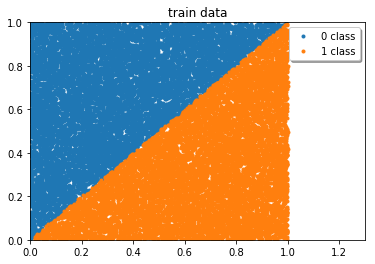

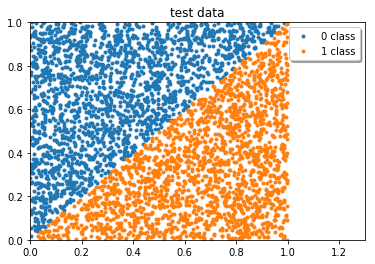

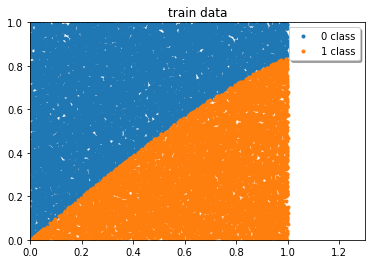

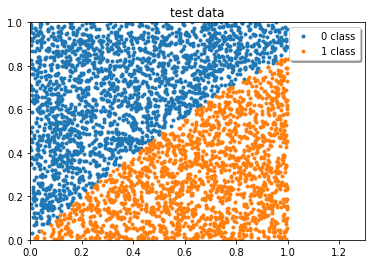

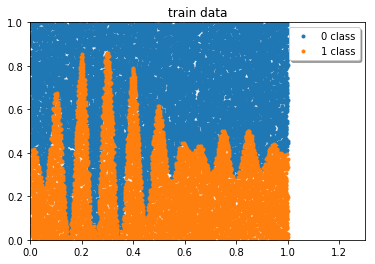

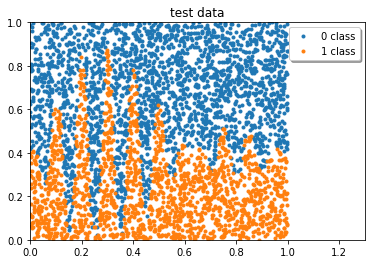

((array([[0.90677979, 0.19200986],
         [0.93098351, 0.35321738],
         [0.03240839, 0.53782944],
         ...,
         [0.05160139, 0.39675175],
         [0.21439905, 0.51909792],
         [0.12106623, 0.92080448]]), array([1., 1., 0., ..., 0., 1., 0.])),
 (array([[0.41363262, 0.45352787],
         [0.73965905, 0.70222086],
         [0.79396933, 0.55773069],
         ...,
         [0.27334412, 0.33754812],
         [0.0829966 , 0.42759476],
         [0.89555272, 0.41066607]]), array([1., 0., 0., ..., 1., 1., 0.])))

In [10]:
# Fifth dataset

import numpy as np
import matplotlib.pyplot as plt


def function(x, y):
    return np.abs(np.sin(5 * x) * np.cos(20 * np.pi * x) * np.arctan(x - 1) - 0.5) * 0.8 - y > 0


def linear(x, y, k, b):
    return k * x + b - y > 0


def non_linear(x, y, k, b):
    return k * np.sin(x + b) - y > 0


def load_data(train_size, k=1, b=0, show=False, func_type='lin'):
    test_size = int(train_size * 0.2)

    x_train = np.empty(0)
    y_train = np.empty(0)

    x_test = np.empty(0)
    y_test = np.empty(0)

    train_plt_points0 = np.empty(0)
    train_plt_points1 = np.empty(0)

    test_plt_points0 = np.empty(0)
    test_plt_points1 = np.empty(0)

    for i in range(0, train_size + test_size):
        x = np.random.random()
        y = np.random.random()

        if func_type == 'lin':
            y_type = linear(x=x, y=y, k=k, b=b)
        elif func_type == 'n_lin':
            y_type = non_linear(x=x, y=y, k=k, b=b)
        elif func_type == 'own':
            y_type = function(x, y)
        else:
            raise TypeError('func_type can be lin or n_lin')

        if i < train_size:
            x_train = np.append(x_train, (x, y))
            y_train = np.append(y_train, y_type)

            if y_type == 1:
                train_plt_points1 = np.append(train_plt_points1, (x, y))
            elif y_type == 0:
                train_plt_points0 = np.append(train_plt_points0, (x, y))

        else:
            x_test = np.append(x_test, (x, y))
            y_test = np.append(y_test, y_type)

            if y_type == 1:
                test_plt_points1 = np.append(test_plt_points1, (x, y))
            elif y_type == 0:
                test_plt_points0 = np.append(test_plt_points0, (x, y))

    # reshaping
    x_train.shape = (int(x_train.size / 2), 2)
    train_plt_points0.shape = (int(train_plt_points0.size / 2), 2)
    train_plt_points1.shape = (int(train_plt_points1.size / 2), 2)

    x_test.shape = (int(x_test.size / 2), 2)
    test_plt_points0.shape = (int(test_plt_points0.size / 2), 2)
    test_plt_points1.shape = (int(test_plt_points1.size / 2), 2)

    # plotting
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("train data")
    plt.plot(train_plt_points0.transpose()[0], train_plt_points0.transpose()[1], '.')
    plt.plot(train_plt_points1.transpose()[0], train_plt_points1.transpose()[1], '.')

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    if show:
        plt.show()

    plt.close()

    # plotting
    plt.xlim(0, 1.3)
    plt.ylim(0, 1)
    plt.title("test data")
    plt.plot(test_plt_points0.transpose()[0], test_plt_points0.transpose()[1], '.')
    plt.plot(test_plt_points1.transpose()[0], test_plt_points1.transpose()[1], '.')

    plt.legend(('0 class', '1 class'), loc='upper right', shadow=True)

    if show:
        plt.show()
    plt.close()

    return (x_train, y_train), (x_test, y_test)


load_data(20000, 1, 0, True, 'lin')
load_data(20000, 1, 0, True, 'n_lin')
load_data(20000, 1, 0, True, 'own')



Using TensorFlow backend.


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)
X_train_gray shape: (50000, 32, 32, 1)
X_test_gray shape: (10000, 32, 32, 1)
frog displayed


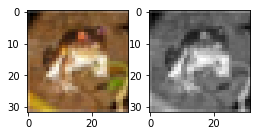

In [11]:
# Eight dataset
# Fetch data from CIFAR-10 dataset (consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.)

import keras
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

class_names = {'[0]': 'airplane', '[1]': 'automobile', '[2]': 'bird', '[3]': 'cat', '[4]': 'deer',
               '[5]': 'dog', '[6]': 'frog', '[7]': 'horse', '[8]': 'ship', '[9]': 'truck'}

# convert class vectors to binary vectors
Y_train = keras.utils.np_utils.to_categorical(y_train)
Y_test = keras.utils.np_utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst


X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)
print("X_train_gray shape:", X_train_gray.shape)
print("X_test_gray shape:", X_test_gray.shape)

# now we have only one channel in the images
# plot a randomly chosen image
img = 0
plt.figure(figsize=(4, 2))
print(class_names[str(y_train[img])], "displayed")
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()
